In [88]:
%matplotlib inline
from fastai.learner import *

In [26]:
def lin(a,b,x):
    return a*x+b

In [27]:
def gen_fake_data(n,a,b):
    x = np.random.uniform(0,1,n)
    y= lin(a,b,x) + 0.1*np.random.normal(0,3,n)
    return x,y

In [28]:
x,y = gen_fake_data(50,3.,8.)

Text(0, 0.5, 'y')

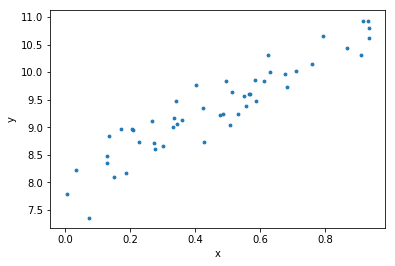

In [29]:
plt.scatter(x,y,s=8) ; plt.xlabel("x") ; plt.ylabel("y")

In [30]:
def mse(y_hat,y):
    return((y-y_hat)**2).mean()

In [31]:
l = [1,3]
n = np.array(l)

In [32]:
np.mean(l) , np.mean(n) 

(2.0, 2.0)

In [9]:
#error   l.mean() 

AttributeError: 'list' object has no attribute 'mean'

In [33]:
n.mean()

2.0

In [34]:
y_hat = lin(10,5,x)
mse(y_hat,y)

3.4083124383716

In [35]:
def mse_loss(a,b,x,y):
    return mse(lin(a,b,x),y)

In [36]:
mse_loss(10, 5, x, y)

3.4083124383716

In [37]:
x,y = gen_fake_data(10000,3.,8.)
x.shape

(10000,)

In [38]:
x,y = V(x),V(y)

In [39]:
a = V(np.random.randn(1) , requires_grad=True)
b = V(np.random.randn(1) , requires_grad=True)
a,b

(Variable containing:
  0.4378
 [torch.FloatTensor of size 1], Variable containing:
 -0.3849
 [torch.FloatTensor of size 1])

In [41]:
learn_rate = 1e-3
for t in range(10000):
    loss = mse_loss(a,b,x,y)
    if t%1000 == 0: print(loss.data[0])
    loss.backward()
    
    a.data -= a.grad.data * learn_rate
    b.data -= b.grad.data * learn_rate
    
    a.grad.data.zero_()
    b.grad.data.zero_()

0.0972551628947258
0.09532520920038223
0.09383520483970642
0.09268475323915482
0.09179658442735672
0.091110959649086
0.0905815064907074
0.09017281234264374


In [18]:
a.data


 3.2600
[torch.FloatTensor of size 1]

# Gradient descent with numpy

In [89]:
from matplotlib import rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3

In [53]:
x,y  = gen_fake_data(50,3.,8.)

In [54]:
a_guess , b_guess = -1. , 1.
mse_loss(a_guess,b_guess,x,y)

82.30247354554947

In [60]:
lr = 0.01
def upd():
    global a_guess , b_guess
    y_pred = lin(a_guess,b_guess,x)
    dydb = 2*(y_pred - y)
    dyda = dydb*x
    b_guess -= lr*dydb.mean()
    a_guess -= lr*dyda.mean()

In [61]:
for t in range(10000):
    upd()
    if t%10 == 0:
        print(mse_loss(a_guess,b_guess,x,y))

78.18181083852843
46.7870849241586
28.014862985343722
16.79015289990114
10.078409472979734
6.06515410656212
3.6654358768697026
2.2305182677691024
1.3724951830780383
0.8594216936365587
0.5526084257183889
0.3691273135211068
0.2593922564443558
0.193753677942895
0.15448286446430587
0.13097907414084115
0.11690367120892459
0.10846650785518305
0.10340128188324382
0.1003528611776428
0.09851093995025403
0.09739098682570425
0.0967032647364808
0.09627451255231685
0.09600111531279792
0.09582110278292477
0.09569740623272682
0.09560784696943514
0.09553915005994168
0.0954833648793521
0.09543572479954138
0.09539336739864661
0.0953545692115029
0.09531828814544116
0.09528388986206955
0.09525098416012273
0.09521932713272234
0.09518876265411562
0.09515918738337759
0.0951305298301241
0.0951027378287202
0.09507577104051448
0.09504959646276684
0.0950241857356294
0.0949995135244762
0.09497555654544104
0.09495229297576588
0.09492970209444042
0.09490776406074311
0.09488645977542429
0.09486577079149353
0.0948456

0.09416988936798239
0.09416988889831465
0.09416988844220653
0.09416988799926695
0.09416988756911542
0.09416988715138284
0.09416988674571079
0.0941698863517508
0.09416988596916485
0.09416988559762468
0.09416988523681123
0.0941698848864149
0.09416988454613501
0.09416988421567911
0.09416988389476398
0.09416988358311416
0.09416988328046186
0.0941698829865474
0.09416988270111873
0.09416988242393064
0.09416988215474532
0.09416988189333157
0.09416988163946521
0.09416988139292831
0.09416988115350916
0.09416988092100223
0.09416988069520814
0.09416988047593286
0.09416988026298834
0.09416988005619178
0.0941698798553657
0.09416987966033766
0.09416987947094028
0.09416987928701108
0.09416987910839202
0.09416987893492994
0.09416987876647592
0.09416987860288546
0.0941698784440178
0.09416987828973694
0.09416987813991043
0.09416987799440944
0.09416987785310928
0.09416987771588853
0.09416987758262961
0.09416987745321803
0.0941698773275426
0.09416987720549576
0.09416987708697237
0.09416987697187089
0.0941

0.09416987310033104
0.09416987310032841
0.09416987310032571
0.09416987310032317
0.09416987310032068
0.09416987310031827
0.09416987310031599
0.09416987310031372
0.09416987310031154
0.09416987310030941
0.09416987310030735
0.09416987310030532
0.09416987310030332
0.0941698731003015
0.0941698731002997
0.09416987310029784
0.09416987310029615
0.09416987310029448
0.09416987310029278
0.09416987310029126
0.09416987310028975
0.09416987310028814
0.09416987310028675
0.0941698731002854
0.09416987310028398
0.09416987310028263
0.09416987310028131
0.09416987310028001
0.09416987310027886
0.09416987310027769
0.09416987310027654
0.09416987310027544
0.09416987310027436
0.09416987310027322
0.09416987310027222
0.09416987310027121
0.0941698731002703
0.09416987310026942
0.09416987310026839
0.09416987310026753
0.0941698731002667
0.09416987310026582
0.09416987310026509
0.09416987310026417
0.09416987310026351
0.09416987310026265
0.09416987310026202
0.09416987310026137
0.09416987310026065
0.09416987310025997
0.094

In [62]:
print(a_guess,b_guess)

2.99724951993313 7.987778462068254


In [90]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(30): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 20), interval=100)
ani

RuntimeError: Requested MovieWriter (ffmpeg) not available

# if we don't use global 

In [80]:
a =1 

In [81]:
def f(): 
    # global a
    a = a+1
    return a

In [82]:
f()

UnboundLocalError: local variable 'a' referenced before assignment

In [83]:
c=1

In [84]:
c = c+1
c

2